In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import FastICA
x = pd.read_csv("BC_Xtrain.csv").drop(columns=["Unnamed: 0"])
y = pd.read_csv("BC_ytrain.csv").drop(columns=["Unnamed: 0"])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
x1 = FastICA(n_components=2, whiten=True).fit_transform(x)

In [3]:
# Kmeans
kmeans = KMeans(n_clusters=2).fit(x1)
labels = pd.Series(data=kmeans.labels_)
result = pd.concat([labels, y], axis=1)
result.columns=["cluster","diagnosis"]
cluster0 = result.loc[result.cluster==0]
cluster1 = result.loc[result.cluster==1]

In [14]:
combined = pd.concat([pd.Series(data=x1[:,0]), 
                      pd.Series(data=x1[:,1]),
                      result], axis=1)
combined1 = []
combined1.append(combined.loc[combined.cluster==0].loc[combined.diagnosis==0])
combined1.append(combined.loc[combined.cluster==0].loc[combined.diagnosis==1])
combined1.append(combined.loc[combined.cluster==1].loc[combined.diagnosis==0])
combined1.append(combined.loc[combined.cluster==1].loc[combined.diagnosis==1])

Text(0.5, 1.0, 'ICA')

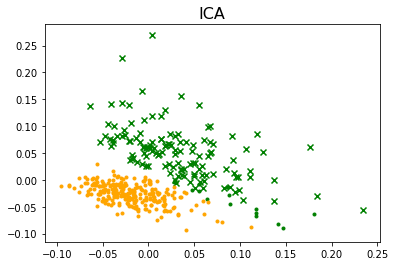

In [23]:
colors = ["green", "green", "orange", "orange"]
markers = [".","x",".","x"]
for i in range(3):
    plt.scatter(combined1[i][0], combined1[i][1], color=colors[i], marker=markers[i])
plt.title("ICA", fontsize=16)

In [4]:
# EM
EM = GaussianMixture(n_components=2, n_init=10).fit_predict(x1)
EMlabels = pd.Series(data=EM)
EMresult = pd.concat([EMlabels, y], axis=1)
EMresult.columns=["cluster","diagnosis"]
EMcluster0 = EMresult.loc[EMresult.cluster==0]
EMcluster1 = EMresult.loc[EMresult.cluster==1]

Text(0.5, -0.05, 'Figure 7. Breast Cancer Dataset with ICA')

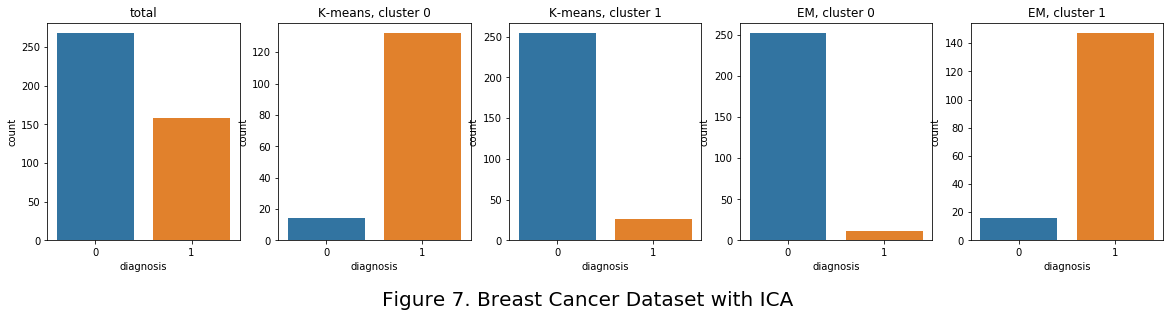

In [5]:
fig, axs = plt.subplots(1,5,figsize=(20,4))
sns.countplot(data=result, x="diagnosis", ax=axs[0]).set_title("total")
sns.countplot(data=cluster0, x="diagnosis", ax=axs[1]).set_title("K-means, cluster 0")
sns.countplot(data=cluster1, x="diagnosis", ax=axs[2]).set_title("K-means, cluster 1")
sns.countplot(data=EMcluster0, x="diagnosis", ax=axs[3]).set_title("EM, cluster 0")
sns.countplot(data=EMcluster1, x="diagnosis", ax=axs[4]).set_title("EM, cluster 1")
fig.suptitle("Figure 7. Breast Cancer Dataset with ICA", fontsize=20,y=-0.05)

In [6]:
x2 = FastICA().fit_transform(x)

In [7]:
import scipy
k_us = scipy.stats.kurtosis(x, axis=0)
k = np.sort(k_us)

In [8]:
k1_us = scipy.stats.kurtosis(x2, axis=0)
k1 = np.sort(k1_us)

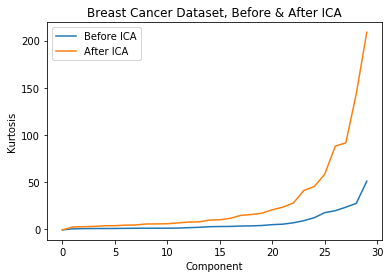

In [9]:
plt.plot(k)
plt.plot(k1)
plt.title("Breast Cancer Dataset, Before & After ICA")
plt.xlabel("Component")
plt.ylabel("Kurtosis")
plt.legend(["Before ICA","After ICA"])

In [23]:
k1_us

array([  4.60294782,   4.39427741,  41.15651199,  -0.64553657,
         3.04667801,   5.71550315,   2.76530947,  10.10428787,
        58.50899347,  45.35535888, 208.82863105,   3.83284181,
        11.66179842,  91.58203346,   9.73098589,  88.21337257,
        20.66769049,  17.05712458,  23.47172073,  15.64672019,
         2.51055866,  14.75841597,   7.8341496 ,   6.78566119,
         5.91856105,   7.65488322,   5.64856792, 143.61041946,
         3.76005269,  27.80450663])

Text(0.5, 1.0, 'Before ICA, kurtosis = 51.0')

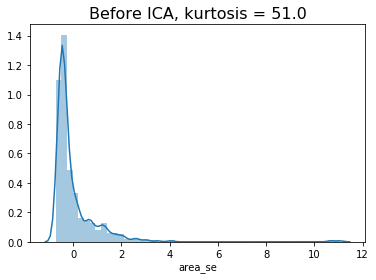

In [10]:
sns.distplot(x.area_se)
plt.title("Before ICA, kurtosis = 51.0", fontsize=16)

Text(0.5, 1.0, 'Before ICA, kurtosis = 27.5')

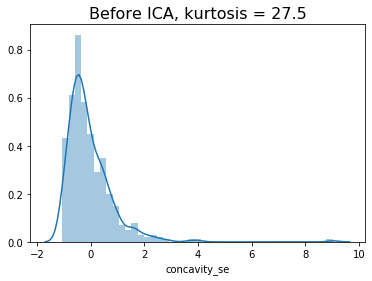

In [11]:
sns.distplot(x.concavity_se)
plt.title("Before ICA, kurtosis = 27.5", fontsize=16)

Text(0.5, 1.0, 'After ICA, kurtosis = 208.8')

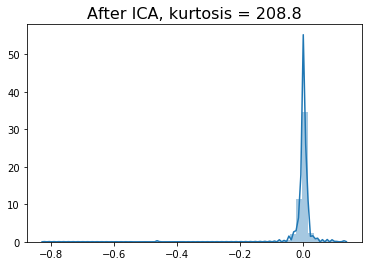

In [24]:
sns.distplot(x2[:,10])
plt.title("After ICA, kurtosis = 208.8", fontsize=16)

Text(0.5, 1.0, 'After ICA, kurtosis = 143.6')

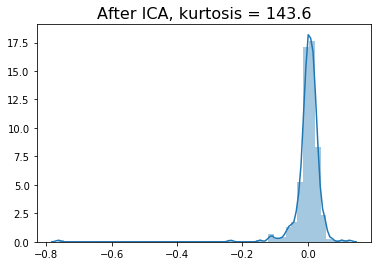

In [25]:
sns.distplot(x2[:,27])
plt.title("After ICA, kurtosis = 143.6", fontsize=16)

In [15]:
###########ANN
x_train = pd.read_csv("BC_Xtrain.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("BC_ytrain.csv").drop(columns=["Unnamed: 0"])
x_test = pd.read_csv("BC_Xtest.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("BC_ytest.csv").drop(columns=["Unnamed: 0"])
y_train = y_train.to_numpy().flatten()
y_test = y_test.to_numpy().flatten()

In [16]:
ica = FastICA(n_components=13, whiten=True).fit(x_train)
x_train1 = ica.transform(x_train)
x_test1 = ica.transform(x_test)

In [17]:
ica1 = FastICA(n_components=2, whiten=True).fit(x_train)
x_train2 = ica1.transform(x_train)
x_test2 = ica1.transform(x_test)
kmeans1 = KMeans(n_clusters=2).fit(x_train2)
x_train2 = kmeans1.transform(x_train2)
x_test2 = kmeans1.transform(x_test2)

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
#train on original dataset
clf = MLPClassifier(max_iter=10000, activation='logistic', hidden_layer_sizes=10)
t = time.time()
clf.fit(x_train, y_train)
t = (time.time()- t) * 1000
train_acc = accuracy_score(y_train, clf.predict(x_train))
test_acc = accuracy_score(y_test,clf.predict(x_test))
print("Original: time %dms, train accuracy %.4f, test accuracy %.4f"%(t, train_acc, test_acc))

Original: time 419ms, train accuracy 0.9836, test accuracy 0.9860


In [19]:
#train on transformed dataset
t = time.time()
clf.fit(x_train1, y_train)
t = (time.time()- t) * 1000
train_acc = accuracy_score(y_train, clf.predict(x_train1))
test_acc = accuracy_score(y_test,clf.predict(x_test1))
print("ICA: time %dms, train accuracy %.4f, test accuracy %.4f"%(t, train_acc, test_acc))

ICA: time 1552ms, train accuracy 0.9742, test accuracy 0.9790


In [20]:
#train on transformed dataset
t = time.time()
clf.fit(x_train2, y_train)
t = (time.time()- t) * 1000
train_acc = accuracy_score(y_train, clf.predict(x_train2))
test_acc = accuracy_score(y_test,clf.predict(x_test2))
print("Kmeans: time %dms, train accuracy %.4f, test accuracy %.4f"%(t, train_acc, test_acc))

Kmeans: time 46ms, train accuracy 0.6291, test accuracy 0.6224
